**I have discussed with Karanam Dhanvi with roll no: 23M1190 while doing the assignment.**

The chatgpt links which are used for reference while writing the code is given below\
https://chat.openai.com/c/36aa29ae-5bc6-471e-b455-5b0ec1e1d2d5 \
https://chat.openai.com/c/e2a57fdd-323d-424b-8a0a-adf47cf4286a \
https://chat.openai.com/c/5e2e2bc4-dca6-4e10-bd4b-e37d016d81ca \
https://chat.openai.com/c/ceddaf8e-17d3-4a77-8cdb-cfb1458d6085 \
https://chat.openai.com/c/5f050543-06e6-487d-b176-c264d97399f3 \
https://chat.openai.com/c/8c86b6c5-2378-4e45-9525-8068d74002fc

Internet link1: https://saskiaotto.github.io/INDperform/reference/nrmse.html \
Internet link2: https://math.stackexchange.com/questions/1962877/compute-the-gradient-of-mean-square-error \


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time


# Ques**1**. Write a function to generate an input data matrix X of size NxD for regression. [0.5]

#a) Input: Sample size N and a generator matrix S of size MxD

# b) Working: First generate a random 2-D array of size NxM where each column has a standard normal distribution and is independent of the other columns. Then multiply this with the generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that if the generator matrix S of size MxD is an identity matrix, then each column of X will remain independent; otherwise we can introduce correlations in the matrix columns of X.

# New Section

In [2]:
def gen_data_matrix(N,S):
    """ N- No. of samples,
        generator matrix S size = MxD
        output matrix X size = NXD
        returns value X = 2-D array multiplied by generator matrix
        D - No.of features
    """
    M, D = S.shape                  # Gives the dimensions of matrix
    array = np.random.randn(N,M)   # Generates normal variate values of dimension NXM

    X = np.dot(array, S)            # matrix multiplication between two matrices size of X is NXD

    return X


**In the next cell I'm considering an example for generating output with random generator matrix and identity matrix.**

In [3]:
"""Consider an example of M =4, D= 10, With No of samples = 100"""
M = 4
D = 10
N = 50
S1 = np.random.randn(M,D) # generates normal distributed values of dimension MXD
S2 = np.eye(max(M,D))       # generates identity matrix of order M


X = gen_data_matrix(N, S1) #calls the function for calculation of X with random entries in generator matrix
print("Output Matrix X is: \n",X)    #Prints the output matrix for random generator matrix
print("Size of the Output matrix is: \n",X.shape)

X2 = gen_data_matrix(N, S2) #calls the function for calculation of X with identity generator matrix
print("\nOutput Matrix X2 is: \n",X2)    #Prints the output matrix for identity generator matrix

Output Matrix X is: 
 [[-2.95269949e+00  1.66461705e+00 -1.97801630e+00 -1.67188761e+00
  -6.93608477e-01 -5.30674667e-01  2.27632934e+00 -1.28509153e+00
  -1.38316713e-01 -1.73544232e+00]
 [-4.59569718e+00  1.14541263e+00 -1.67819888e+00 -5.52913326e-01
  -2.36287183e-01 -4.87181611e-01  2.58012205e+00 -5.68161078e-01
  -9.07665804e-01 -3.47326900e+00]
 [-5.58991779e+00  1.37855404e+00  9.42168396e-01  3.82961152e-01
   1.72857392e+00 -1.30271284e+00  2.81294723e+00  9.52143967e-01
  -1.72191622e+00 -5.22523221e+00]
 [ 4.55011396e+00 -9.48997524e-01 -2.58698765e-01 -4.94431171e-01
  -1.09298128e+00  8.32584743e-01 -2.24283323e+00 -5.39243324e-01
   1.43481497e+00  4.46640385e+00]
 [ 6.66797577e+00 -5.03250829e+00 -5.43350545e+00  3.25239564e+00
  -4.84175837e+00  4.39512641e+00 -4.83577351e+00 -2.27171438e+00
   1.19098920e+00  3.84915467e+00]
 [ 3.08265222e-01 -1.08159131e+00  2.38077284e-01  2.52895771e+00
   3.59487344e-01  6.67406715e-01 -7.78949552e-01  2.80321918e-01
  -9.504932

**In the above, for random generator matrix the elements of output matrix will have correlation.
But in other case where generator matrix is identity matrix , the elements of ouput matrix are not correlated. **

# Ques**2**. Write a function to generate the target vector t of size Nx1: [0.5]

# a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ

# b) Working: Check for dimension mismatch between X and w, multiply X with w (sans one element) and add the bias (the excluded element), then add zero-mean Gaussian noise with variance σ.

In [5]:
# Function to find target vector
def target_vector(X,w,var):# Takes the input as data matrix, weight vector and noise variance
  #Finding the dimension mismatch for matrix multiplication
  X_rows, X_cols = X.shape
  w_rows, w_cols = w.shape
  noise = np.random.normal(0, np.sqrt(var), (X.shape[0],1)) # random noise with zero mean and sigma variance generated
  if(X_cols != w_rows):

    tgt_vec = np.dot(X,w[1:])+w[0]+noise #w[0] = bias; X.w[1:] gives the vector from 2nd value since bias is taken from one the element of W vector whose size is (D+1) X 1
  else:

    tgt_vec = np.dot(X,w)+noise #When this function is called to generate the target vector with dimension of W as DX1 (D - no.of features)
  return tgt_vec # returns target vector



**In the above cell the function is witten for generating target vector. Now we aregoing to check the target vector whose inputs are given as X,w, var**

In [ ]:
#Example for Generating target vector
D = 10
w = np.random.randn(D+1,1)#Generating weight vector of size
var = 0.01
tar_vec = target_vector(X,w,var) # calling the function target_vector
print("The target vector of size ", tar_vec.shape, " is given by \n",tar_vec) #prints the generated target vector

Dimension error while multiplication

The target vector of size  (50, 1)  is given by 
 [[ 1.1753806 ]
 [ 8.33009795]
 [ 3.45750802]
 [-1.48905688]
 [ 4.7878528 ]
 [-1.10269063]
 [ 1.63362815]
 [ 1.90670964]
 [-1.12268564]
 [ 7.0282124 ]
 [ 9.85507738]
 [-2.49614662]
 [ 2.28926887]
 [-0.28007456]
 [ 0.97960974]
 [-4.25413029]
 [-2.1686501 ]
 [ 0.57600428]
 [-1.70484881]
 [-5.78007042]
 [ 2.37235537]
 [ 0.11100985]
 [ 1.08368053]
 [ 4.15862762]
 [-4.82583   ]
 [ 2.00239284]
 [ 2.64801292]
 [-1.61921644]
 [-4.36170851]
 [ 4.44458672]
 [-1.69211167]
 [-2.39514572]
 [ 0.25392964]
 [ 2.03578126]
 [ 2.7917454 ]
 [-4.70672858]
 [ 0.38817983]
 [ 8.78439559]
 [ 4.57709282]
 [-0.22355638]
 [-0.09307265]
 [-4.04400379]
 [ 0.99342527]
 [-2.73540136]
 [ 0.79731605]
 [-0.12543327]
 [ 5.99338664]
 [ 2.43856341]
 [-4.94066735]
 [ 0.47249842]]


**The target vector is generated for D = 10, random weight vector and the data matrix returned from generator matrix.**

# Ques 3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N (use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve the problem above a particular value of N? What could be the reason for the same?

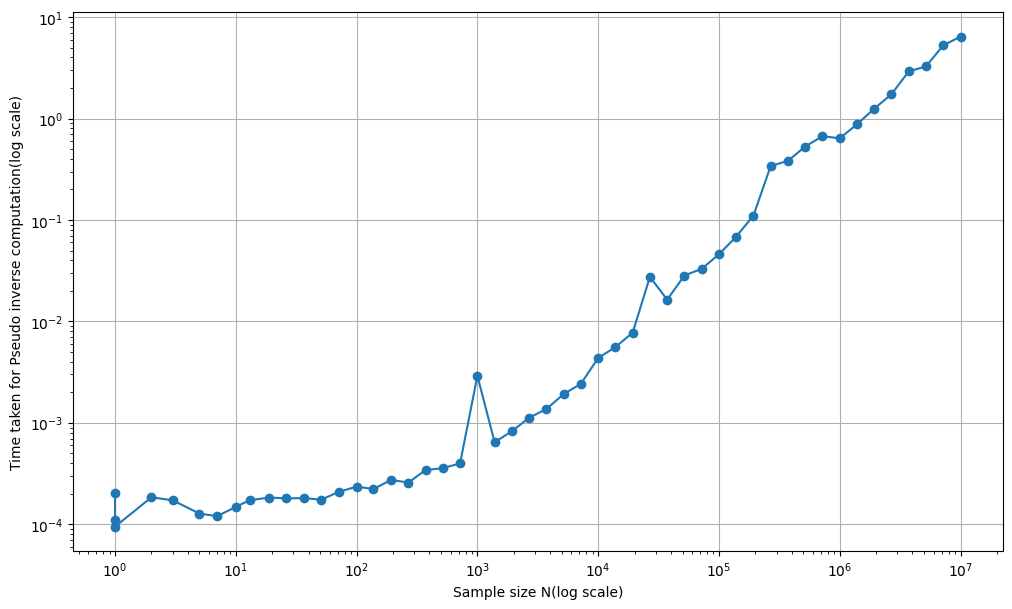

In [8]:
# From the example code provided in the course i used time.perf_counter and pinv function
D=10
N_log = np.logspace(0,7, num=50, dtype =int)
time_dur= []
for i in N_log:
  X3 = gen_data_matrix(i,S2)
  tic = time.perf_counter() #starting the timer
  np.linalg.pinv(X3)#linalg is linear algebra module and pinv is used to find psuedo inverse
  toc = time.perf_counter()# ending the timer
  time_dur.append(toc - tic) # Time taken to perform the pinv operation.

#Plotting the graph
# Graph is between the time taken w.r.t N in log scale, with fixed D = 10
plt.figure(figsize= (12,7))
plt.plot(N_log, time_dur, marker = 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample size N(log scale)')
plt.ylabel('Time taken for Pseudo inverse computation(log scale)')
plt.grid(True)
plt.show()

**The time taken for execution with N= 10^7 is 40 sec and when N = 10^10 the computer is running out of resources and execution failed.
As the no.of samples increases, the size of matrix increases the computational complexity which lead to the outage of resources so the time increases.
or The matrix can become ill-conditioned which lead to take more time for calculating the pseudo inverse.**

# Ques 4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target vector t and a predicted vector y.

obs - observed values.
NRMSE can have different formula  the **mean**: NRMSE = RMSE / mean(obs) - the **standard deviation**: NRMSE = RMSE / sd(obs) - the **difference between maximum and minimum**: NRMSE = RMSE / (max(obs)-min(obs) - the **interquartile range**; NRMSE = RMSE / (Q1-Q3), i.e. the difference between the 25th and 75th percentile of observations. \

Sources: https://saskiaotto.github.io/INDperform/reference/nrmse.html



$ NRMSE = \frac{RMSE}{sd \, (or) \, mean \, (or) (max-min)}$\
$where \ RMSE = \sqrt{\sum\frac{1}{n}(t-y)^2}$ \

I'm considering standard deviation for calculating RMSE.

In [9]:
def find_nrmse(tar_vec,y): #defining the function for calculating nrmse with target vector and predictor vector as inputs
  sd = np.std(tar_vec)
  RMSE = np.sqrt(np.mean(tar_vec-y)**2)#RMSE is done as per the function written in the above cell
  NRMSE = RMSE / sd
  return NRMSE# returns NRMSE after the calculation.

*In the above cell function for NRMSE has been generated. Now we are going to test it with sample data.Target vector which is already generated and the predicted values y = Xw.*

In [21]:
#Example to check the function  NRMSE
D = 10
var = 2
N = 1000
G = np.identity((D))
X = gen_data_matrix(N, G)
w = np.random.randn(D+1,1)
tar_vec = target_vector(X,w,var)
y = np.dot(X,w[1:]) # y = xw
nrmse = find_nrmse(tar_vec, y)# calling the function for generating nrmse
print("The value of NRMSE is : \n" ,nrmse)# Prints the calculated NRMSE

The value of NRMSE is : 
 0.34908491253469465


**Observation: As the number of samples increase the NRMSE keeps on decreasing**

# Ques **5**. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of linear regression. Figure out what should be the inputs and outputs.
 **Mean square error** = $\frac{1}{2N}\sum_{i=1}^{N}(t_{i} - y_{i})^2$ \
 **Gradient of MSE** = $\frac{1}{N}X^{T}.(y - t)$ \
 The website from where the formula is taken.
  https://math.stackexchange.com/questions/1962877/compute-the-gradient-of-mean-square-error

In [14]:
def gmse(X,tar_vec,y):
  N= X.shape[0] # returns the number of rows of X i.e., N
  GMSE = (1/N)*np.dot(X.T,(y-tar_vec)) #(y-tar_vec gives the error between predicted value and target vector)
  return GMSE

**In the above cell the function is defined for calculating the gradient of mean square error by the taking the inputs as data matrix, target vector and predicted vector. The function returns gradient of mean square error. And in the below cell we will see the example for calculating the gradient of MSE by using the function generated above.**

In [17]:
#Finding the gradient of mean squared error
grad_MSE = gmse(X,tar_vec,y)
print("The gradient of mean square error is:\n",grad_MSE, "\n And The size of the matrix is :\n",grad_MSE.shape)#The size of it DX1

The gradient of mean square error is:
 [[ 0.01787437]
 [ 0.01363546]
 [ 0.02060391]
 [ 0.02560765]
 [ 0.03447347]
 [ 0.00564594]
 [ 0.08634935]
 [ 0.01145802]
 [ 0.07072607]
 [-0.0029343 ]] 
 And The size of the matrix is :
 (10, 1)


**The gradient of mean square is calculated for the given matrix. The gradient of mean square error becomes stable with number of samples.**

# Ques 6. Write a function to calculate gradient of L2 norm of weights with respect to weights. [0.5]

The L2 norm or euclidean norm of a vector
\begin{align}
w =\begin{bmatrix} w_{1} \\ w_{2}\\ \vdots \ \\ w_{n}\\ \end{bmatrix} \;  is  \; || w ||_{2} = \sqrt {(w_{1}^2 + w_{2}^2 +...+w_{n}^2)}
\end{align}
\
And the gradient w.r.t to its weights is $\frac{w}{||w||_{2}}$






In [18]:
# Function for finding the gradient of L2 norm
def grad_L2_norm(w):
  if(np.linalg.norm(w,ord=2) == 0):# If all the elements of the matrix is zero then the gradient doesn't exist.
    print("gradient of L2 norm doesn't exist. Since w = 0.\n")

  grad_L2norm = 2*w # Functions returns a value of twice the vector.


  return grad_L2norm

**In the above cell the function is written to generate gradient of L2 norm of weights w.r.t its weights. It takes the arguments as weight vector and returns the grad of L2 norm w.r.t weights. In the below cell we will see an example for it.**

In [ ]:
#Example for finding the gradient of L2 norm
Grad_l2_norm = grad_L2_norm(w[1:])
print("The gradient of L2 norm of weights with respect to weights is: \n", Grad_l2_norm, "\n And the size of it is: \n",Grad_l2_norm.shape) #Prints the gradient of L2 norm of weights w.r.t to weights.
#The size of vector is DX1

The gradient of L2 norm of weights with respect to weights is: 
 [[-1.96808429]
 [-0.24572307]
 [-2.20816446]
 [ 0.39553289]
 [-3.29431632]
 [ 1.67786203]
 [ 0.7337616 ]
 [-1.35952773]
 [ 0.17945524]
 [ 0.15679018]] 
 And the size of it is: 
 (10, 1)


The same observation is found as number of samples increases the gradient of L2 norm is becoming satble.

# Ques 7. Write a function to calculate gradient of L1 norm of weights with respect to weights. [0.5]

**The L1 norm of a vector is the sum of the absolute values of the elements. The gradient of L1 norm of weights w.r.t weights will give either +1 or -1 based on the sign of the weight. If the weight is zero, the gradient is not defined. So, I have chosen as 0. **

In [24]:
#Function to generate gradient of L1 norm
def grad_L1_norm(w):
  grad_l1 = np.sign(w) #returns +1 or -1 or 0 based on the values of w. If w= +ve returns +1, w = -ve returns -1, 0 when w =0
  grad_l1[w == 0] = 0 #Considering the subgradient at zero as -1

  return grad_l1

In [25]:
#Example for finding gradient of L1 norm
grad_L1norm = grad_L1_norm(w[1:])#Takes the weight vector as input and returns gradient of L1 norm
print("The gradient of L1 norm of weight vector is:\n",grad_L1norm,"\n And the shape of it is: \n",grad_L1norm.shape)#The shape of it is DX1

The gradient of L1 norm of weight vector is:
 [[-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]] 
 And the shape of it is: 
 (10, 1)


**The gradient of L1 norm becomes sparse with increase in number of samples.**

# Ques8. Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. Use an appropriate stopping criterion.

In [26]:
#Defining the function for finding the gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression
def grad_MSE_plus_lambda1L1_plus_lambda2L2(X,tar_vec,w,yeta,lambda1,lambda2,iter,tol):


  for i in range(iter):
    prev_w = w.copy()  #Initialises with w vector which is randomly generated and it sans one element and also updates the prev value after every iteration
    y= np.dot(X,w) # Generating y from X and weight vector
    L1_reg = grad_L1_norm(w) # gradient descent on L1 for linear regression(L1 regularisation)
    L2_reg = grad_L2_norm(w) #gradient descent on L2 for linear regression(L2 regularisation)
    error = y - tar_vec

    grad_MSE_with_reg = gmse(X,tar_vec,y) + lambda1 * L1_reg + lambda2* L2_reg # calling the functions of grad of MSE,L1 norm and L2 norm to sind the gradient on  MSE + λ1 L1 + λ2 L2
    w = w - yeta* grad_MSE_with_reg #Newton raphsons formula to find the approximate solution of next step

    if np.linalg.norm(w-prev_w, ord =2) <= tol:#condition to check the stopping criteria
      print(f"w converged after {i+1} iterations.")

      return w
      break
   # The below statemens are disabled because the time taking for printing when function is called by another cells is more
  if np.linalg.norm(w-prev_w, ord =2) >tol:#If the value doesn't converge with the no of iterations provided then it will ask for increasing the no.of iterations
   print(f"w didn't converge in {iter} number of iterations. So, increase the number the iterations.")

   return w


**In the above cell code is written for finding gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. It takes the inputs as data matrix, weights vector, target vector, learning rate(yeta), lambda1, lambda2, no.of iterations and tolerance. Returns the weight vector also prints the stopping criteria.**

In [29]:
#Example for finding gradient descent
#Defining the values to pass as arguments to the function for finding the gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression
lambda1 = 0.01
lambda2 = 0.01
tol = 1e-6
iter = 2000
yeta = 0.01
w = np.random.randn(D,1)
print(w.shape)
grad_des = grad_MSE_plus_lambda1L1_plus_lambda2L2(X,tar_vec,w,yeta,lambda1,lambda2,iter,tol)#The grad_des function is called to find the gradient descent
print("The gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression is :\n",grad_des)


(10, 1)
w converged after 1175 iterations.
The gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression is :
 [[-1.27563284]
 [-1.4678172 ]
 [ 0.05365326]
 [ 1.05225906]
 [-0.27875582]
 [ 0.65619521]
 [ 1.35511523]
 [-0.63367706]
 [-2.04293699]
 [ 0.77048097]]


**In the above the stopping criteria is taken in such a way that the L2 norm between present weight vector and previous weight vector less than 1e-6.
And the weight vector is convereged in 1175 iterations when it was run last time. But most of the times it is happeing near 1000 iterations.**

#Ques 9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the results of the following experiment run five times for each value of σ where G is an identity matrix. Generate a random data matrix X and target vector t with noise variance σ,  and split it into training and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ. Comment on the results

w converged after 729 iterations.
w didn't converge in 2000 number of iterations. So, increase the number the iterations.
w converged after 737 iterations.
w converged after 649 iterations.
w converged after 768 iterations.
w converged after 744 iterations.
w converged after 739 iterations.
w converged after 745 iterations.
w converged after 703 iterations.
w converged after 676 iterations.
w converged after 759 iterations.
w converged after 729 iterations.
w didn't converge in 2000 number of iterations. So, increase the number the iterations.
w converged after 803 iterations.
w converged after 754 iterations.
w converged after 768 iterations.
w converged after 818 iterations.
w converged after 899 iterations.
w converged after 915 iterations.
w converged after 801 iterations.
w converged after 818 iterations.
w converged after 863 iterations.
w converged after 811 iterations.
w converged after 799 iterations.
w converged after 924 iterations.


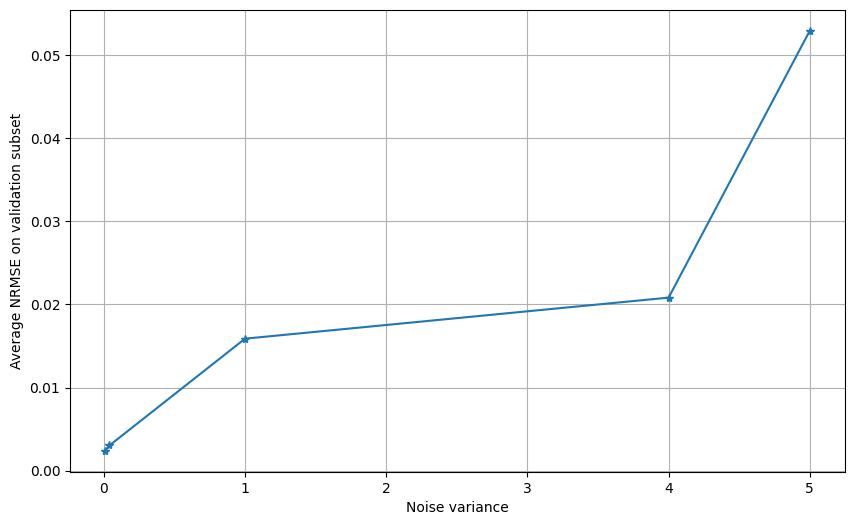

In [40]:
#Source: https://chat.openai.com/c/8c86b6c5-2378-4e45-9525-8068d74002fc
lambda1 = 0.01
lambda2 = 0.01
tol = 1e-6
iter = 2000
yeta = 0.01
vars = [0.01,0.04,1,4,5]#Considering 5 different values for variance
N_sam = 1000 #No.of samples
D = 10 #No.of features
G = np.identity(D)
runs = 5#For every var value we need to run the loop for 5 times
nrmse_results = []
for var in vars:#For different var values
  nrmse_per_sigma = []
  for _ in range(runs):#loop runs for 5 times
    data_mat_X = gen_data_matrix(N_sam,G)#size of data matrix is NXD, N-No.of samples, D-No.of features
    split = int(N_sam*0.75)#splitting factor is considered as 0.75
    Train_data, valid_data = data_mat_X[:split], data_mat_X[split:]#Input data is split into training and validation based on the split factor
    avg_nrmse_list =[]
    weights = np.random.randn(D,1)#weight vector
    tar_vec_t = target_vector(data_mat_X,weights,var) # calling the function target_vector
    Train_t,valid_t = tar_vec_t[:split], tar_vec_t[split:]#target vector is split based on the splitting factor
    trained_w = grad_MSE_plus_lambda1L1_plus_lambda2L2(Train_data,Train_t,weights,yeta,lambda1,lambda2,iter,tol)#gradient descent function is called every time for different variances to find the trained weights
    predict_y = np.dot(valid_data,trained_w)#The values are predicted based on the trained weights
    nrmse = find_nrmse(valid_t, predict_y)#NRMSE is found by calling the find NRMSE function written in ques 4
    nrmse_per_sigma.append(nrmse)#Appending the values of NRMSE to a list
    nrmse_list1 = np.array(nrmse_per_sigma)#converting the list into an array
  avg_nrmse = np.mean(nrmse_list1)#Averaging the result over mean
  nrmse_results.append(avg_nrmse) #Appending the avg_nrmse to plot nrmse for different var values

#Plotting average nrmse vs var
plt.figure(figsize= (10,6))
plt.plot(vars, nrmse_results, marker = '*')
plt.xlabel('Noise variance')
plt.ylabel('Average NRMSE on validation subset')
plt.grid(True)
plt.show()

**Observation: The value of Average NRMSE increases with increase in noise variance**

# Ques 10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent. Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and noise variance σ. Comment on the results.

(10, 1)
w converged after 39 iterations.
w converged after 5 iterations.
w converged after 31 iterations.
w converged after 53 iterations.
w converged after 17 iterations.
w converged after 184 iterations.
w converged after 213 iterations.
w converged after 153 iterations.
w converged after 149 iterations.
w converged after 207 iterations.
w converged after 196 iterations.
w converged after 188 iterations.
w converged after 182 iterations.
w converged after 184 iterations.
w converged after 184 iterations.
w converged after 58 iterations.
w converged after 59 iterations.
w converged after 58 iterations.
w converged after 59 iterations.
w converged after 60 iterations.
w converged after 9 iterations.
w converged after 9 iterations.
w converged after 9 iterations.
w converged after 9 iterations.
w converged after 9 iterations.
w converged after 1 iterations.
w converged after 1 iterations.
w converged after 1 iterations.
w converged after 1 iterations.
w converged after 1 iterations.
w c

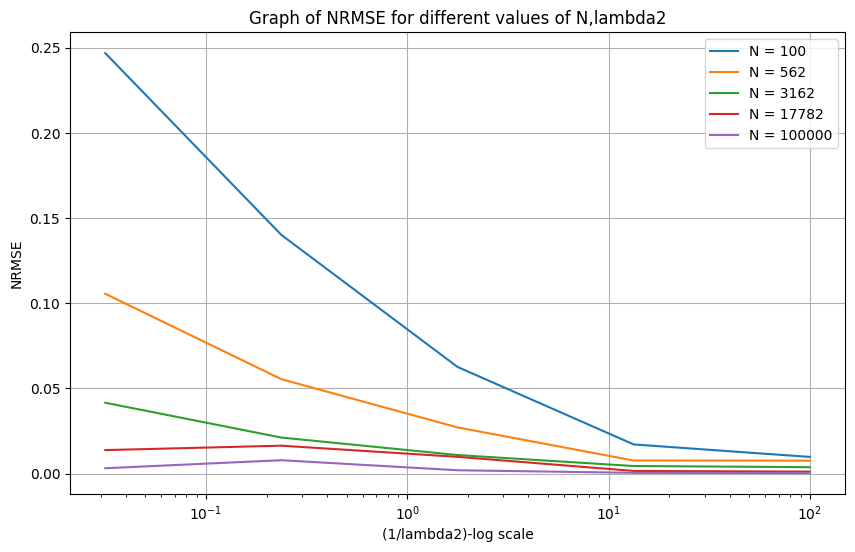

In [48]:
D = 10#No.of features
yeta =  0.01
lambda1 = 0
iter = 30000
tol = 1e-3
var = 0.1
runs = 5
w= np.random.randn(D,1)
print(w.shape)
N = np.logspace(2,5, num = 5, dtype = int)
lambda2 = np.logspace(-2, 1.5, num = 5)
nrmse_results= np.zeros((5,5))#N value upto 5,lambda2 values also upto 5
G = np.identity(D)#Generator matrix
for i,n in enumerate(N):#Ranging the values of i over N
  for j,l2 in enumerate(lambda2):#Ranging the values of j over lambda2
    nrmse_per_run = []
    for _ in range(runs):  #Repeating the experiment for 5 times
      data_mat_X = gen_data_matrix(n,G)#Generation of data matrix
      tar_vec_t = target_vector(data_mat_X,w,var)#Generation of target vector
      split = int(n*0.75)#defining the split factor as 0.75
      Train_data, valid_data = data_mat_X[:split], data_mat_X[split:]#Splitting of data vector based on splt factor
      Train_t,valid_t = tar_vec_t[:split], tar_vec_t[split:]  #Splitting th target vectr based  on split factor
      trained_w = grad_MSE_plus_lambda1L1_plus_lambda2L2(Train_data,Train_t,w,yeta,lambda1,l2,iter,tol)#Trained weights are found by calling grad_descent function on training data
      predict_y = np.dot(valid_data,trained_w)#Predicting the y vector from trained weights
      nrmse = find_nrmse(valid_t, predict_y)#Claling the function NRMSE to find nrmse for different N and lambda values
      nrmse_per_run.append(nrmse)#storing the nrmse for each run
    avg_nrmse = np.mean(nrmse_per_run) #Taking the average of nrmse over 5 runs.
    nrmse_results[i,j] = avg_nrmse#NRMSE results are stored into an array for different N and lambda2 values.

#Plotting the graph of NRMSE for different values of N,lambda2
plt.figure(figsize = (10,6))
for i, n in enumerate(N):
  plt.xscale('log')
  plt.plot((1/lambda2), nrmse_results[i,:], label = f'N = {n}' )
plt.xlabel('(1/lambda2)-log scale')
plt.ylabel('NRMSE')
plt.title('Graph of NRMSE for different values of N,lambda2')
plt.grid()
plt.legend()

**Observation:
As the value of lambda2 increases(from 10^-2 to 10^2) weight vector is not getting converged. And is taking more time for execution. So, the lambda2 range in log scale is taken from -2 to 1.5(10^-2 to 10^1.5). For high value of lambda the NRMSE is high.As we have plotted for 1/lambda for (1/lambda2) = 10 to 20 i.e., lambda2 from 0.1 to 0.05, we are getting the sweet spot of lambda2.**

# Que11. Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat the experiment. Are the results different? Comment on the results

(1000, 10)
(1000, 1)
w converged after 36 iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.


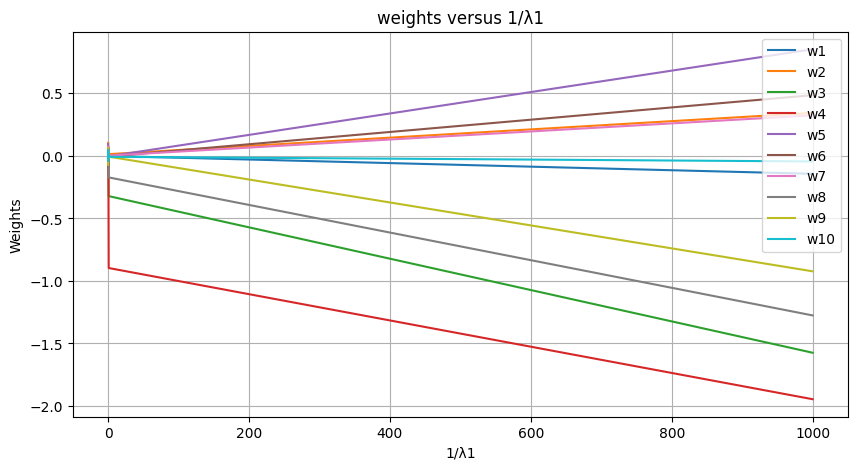

In [72]:

N = 1000
D = 10
lambda1 = np.linspace(0.001,10,num = 10)
lambda2 = 0
var = 2
yeta = 0.01
wt= np.random.randn(D,1)#generation of weight vector
G = np.identity(D)
data_mat_X = gen_data_matrix(N,G)#generation of dat amatrix
print(data_mat_X.shape)
tar_vec_t = target_vector(data_mat_X,wt,var)#Generation of target  vector
print(tar_vec_t.shape)
split = int(n*0.75)#defining the split factor as 0.75
Train_data, valid_data = data_mat_X[:split], data_mat_X[split:]#Splitting of data vector based on split factor
Train_t,valid_t = tar_vec_t[:split], tar_vec_t[split:]#Splitting th target vectr based  on split factor
weight_values = np.zeros((10,10))#First parameter is D=10 and length of lambda1 values i.e., 100

for i,l1 in enumerate(lambda1):#Loop till weights are stored for different lambda1 values
  trained_data = grad_MSE_plus_lambda1L1_plus_lambda2L2(Train_data,Train_t,wt,yeta,l1,lambda2,iter,tol)#Trained weights are found by calling grad_descent function on training data
  trained_data = trained_data.flatten()
  weight_values[:,i] = trained_data#Storing the values of w in weight_values

#Plotting the graph of imapct of  λ1 on variable elimination for uncorrelated data
plt.figure(figsize = (10,5))
for i in range(10):
  plt.plot((1/lambda1), weight_values[i], label = f'w{i+1}' )

plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('weights versus 1/λ1')
plt.grid()
plt.legend(loc = 'upper right')

#The different weight lines are columns of weight vector.

**As 1/lambda1 decreases i.e., lambda1 increases , the weights decreases and go to zero for lambda1 = very high for uncorrelated data which results in variable elimination.The different weight lines are columns of weight vector.
The weights are converged only once but not cnverged for other values of lambda2**

**In the below cell the ques11 wih correlated data is shown**

(2000, 10)
(2000, 1)
w converged after 18 iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.


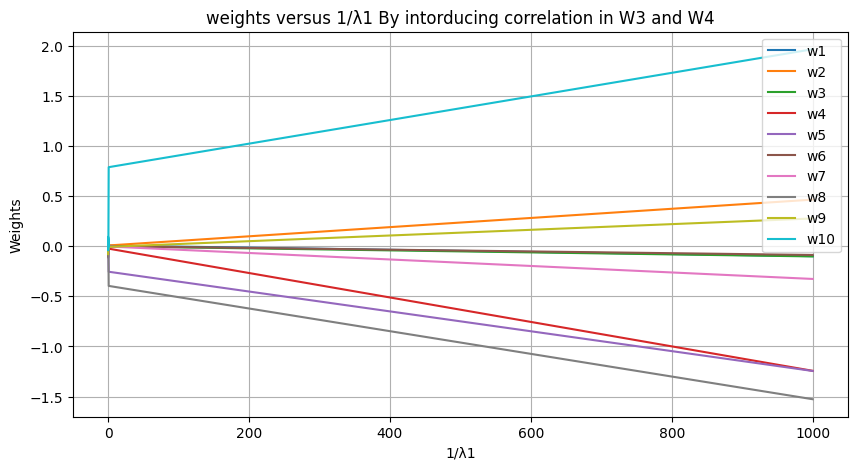

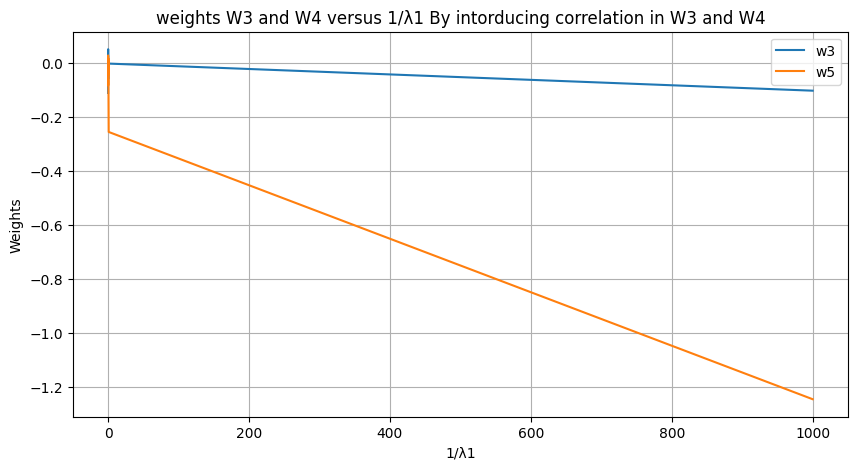

In [73]:
#By introducing correlation in the columns 3 and 5 and repeating the same code which is written in the above cell

N = 2000
D = 10
lambda1 = np.linspace(0.001,10,num = 10)
lambda2 = 0
var = 2
yeta = 0.01
wt= np.random.randn(D,1)#generation of weight vector
G = np.identity(D)
data_mat_X = gen_data_matrix(N,G)#generation of data matrix
data_mat_X[:,2] = data_mat_X[:,4]#Introducing correlation in columns 3 and 5
print(data_mat_X.shape)
tar_vec_t = target_vector(data_mat_X,wt,var)#Generation of target  vector
print(tar_vec_t.shape)
split = int(n*0.75)#defining the split factor as 0.75
Train_data, valid_data = data_mat_X[:split], data_mat_X[split:]#Splitting of data vector based on split factor
Train_t,valid_t = tar_vec_t[:split], tar_vec_t[split:]#Splitting th target vectr based  on split factor
weight_values = np.zeros((10,10))#First parameter is D=10 and length of lambda1 values i.e., 10

for i,l1 in enumerate(lambda1):#Loop till weights are stored for different lambda1 values
      trained_data = grad_MSE_plus_lambda1L1_plus_lambda2L2(Train_data,Train_t,wt,yeta,l1,lambda2,iter,tol)#Trained weights are found by calling grad_descent function on training data
      trained_data = trained_data.reshape(-1)
      weight_values[i] = trained_data#Storing the values of w in weight_values

#Plotting the graph of imapct of  λ1 on variable elimination for uncorrelated data
#Plot which has all weights
plt.figure(figsize = (10,5))
for i in range(10):
  plt.plot((1/lambda1), weight_values[:,i], label = f'w{i+1}' )
plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('weights versus 1/λ1 By intorducing correlation in W3 and W4')
plt.grid()
plt.legend(loc = 'upper right')

#Plotting the graph of imapct of  λ1 on variable elimination for uncorrelated data
#Plotting the weights whose columns were introduced with correlation
plt.figure(figsize = (10,5))
for i in range(10):
  if( i ==2 or i==4 ):
   plt.plot((1/lambda1), weight_values[:,i], label = f'w{i+1}' )
plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('weights W3 and W4 versus 1/λ1 By intorducing correlation in W3 and W4')
plt.grid()
plt.legend(loc = 'upper right')

After the introduction of correlation, the weights are not going to zero at same time. which means the features are not getting eliminated when there is correlation. We can see that in 51 iterations w1 converged.Remaining are not converged

# *Ques* 12.Show the grouping effect of elastic net on correlated columns of X

w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.
w didn't converge in 30000 number of iterations. So, increase the number the iterations.


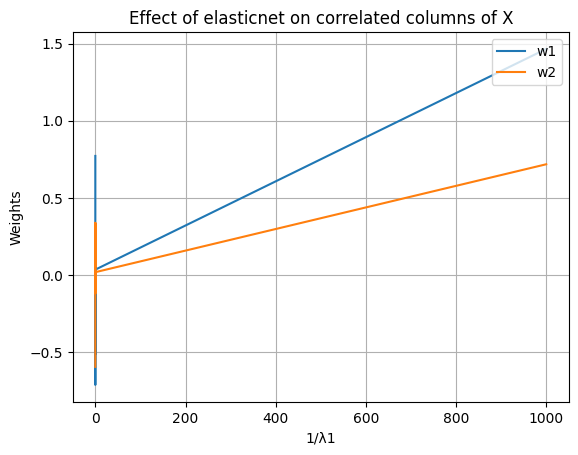

In [78]:
#Grouping effect of elasticnet on correlated columns of X
np.random.seed(0)
#The same correlation which was introduced in columns of data matrix in Ques 11 is used here i.e., data_X_corr and the same traget vector i.e., tar_vec_t.
#The arguments of the function are also taken same as above excpet the lambda1 which is also made fixed here.Let lambda1 be 0.01
D = 10
wts = np.random.randn(D,1)#random weight vector is generated with dmensions (no.of features X 1)
N = 1000
var = 1
yeta = 0.01
lambda2 = 0.001
iter = 30000
tol = 1e-6
lambda1 = np.linspace(0.001,100, num = 10)
G = np.identity(D)
data_mat_X = gen_data_matrix(N,G)
data_X_corr = data_mat_X
elastic_coeff = np.zeros((10,10))#lambda1 = 10 and D= 10

data_X_corr[:,1] = data_X_corr[:,0]  #column 0 data is added some other constant (x1 = x0 + k) and pasted to column 1
tar_vec_t= target_vector(data_X_corr,wts,var)

for i, l_1 in enumerate(lambda1):
  w = grad_MSE_plus_lambda1L1_plus_lambda2L2(data_X_corr,tar_vec_t,wts,yeta,l_1,lambda2,iter,tol)#p is the value of no.of smaples where convergence occurs.
  w = w.reshape(-1)
  elastic_coeff[i] = w

for i in range(10): #range = 10 since D = 10
  if (i==0 or i == 1):
   plt.plot((1/lambda1), elastic_coeff[:,i], label = f'w{i+1}' )
plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('weights versus 1/λ1')
plt.grid()
plt.legend(loc = 'upper right')
plt.title('Effect of elasticnet on correlated columns of X')
plt.show()


**The grouping is happening between the columns where  correlation is introduced. L1 is making the weights to become zero. lambda 1 is varied by taking small lambda2 value.The plot is plotted for the correlated columns where the grouping effect can be observed.
They are converging at same point.**

# Ques13.Write a function for generating linear binary classification vector t with noise variance σ

In [79]:
#Function to generate the binary classification vector t with noise var sigma
def linear_bin_class(data_mat_X,wt,var):
  tar_vec_t = target_vector(data_mat_X,wt,var)#generation of target vector
  sign_tar_vec = tar_vec_t >0
  tar_vec_class = sign_tar_vec.astype(int)#If sign of target vector is positive outputs 1, if -ve outputs 0
  return tar_vec_class #Returns classification of target vector

In [80]:
#Checking the classification
N = 5
var = 1
data_mat_X = gen_data_matrix(N,G)
wt = np.random.randn(D,1)
tar_vec = linear_bin_class(data_mat_X,wt,var)
print("The clssified target vector is :\n",tar_vec)

The clssified target vector is :
 [[1]
 [1]
 [0]
 [1]
 [0]]


**The example to check the function of binary classification is shown above.**

# **Ques14**.Write a function for computing gradient of binary cross-entropy for logistic regression

$Let \; z_{j} = W^Tx_{j};\\
y_{j} = \frac{1}{(1+e^{-z_{j}})} \, sigmoid \, function$

If we find the gradient of cross entory loss in logistic regression we get
$ \frac{\partial{L}}{\partial{w_{i}}}=(y_{j}-t_{j})x_{ij}$ \\
$where \, 'j'\;  is \, j^{th} \,training sample\, and \, 'i' \, is \; i^{th} weight, \\y_{i} = predicted \; sample \; and\; t_{j} = target \;sample $


# $gradient = \frac{X^T(y-t)}{no.of samples}$



In [81]:
#Function defined for calculating gradient of cross entropy,The calculation of it is given in the above cell.
#The same has been written inside the function
def grad_cross_entropy(X,w,tar_vec):
  z = np.dot(X,w)
  y = 1/(1+np.exp(-z))#sigmoid function.
  grad_cross = np.dot(X.T,(y-tar_vec))#y- predicted vector, tar_vec - target vector
  return grad_cross

In [83]:
#Example for checking gradient of cross entropy
X = np.array([[1,2],[3,4]])
w= np.array([[2],[5]])
tar_vec = np.array([[6,7],[8,9]])
print("The gradient of cross entopy is :\n",grad_cross_entropy(X,w,tar_vec))

The gradient of cross entopy is :
 [[-26.00000614 -30.00000614]
 [-38.00001229 -44.00001229]]


**The example which finds the gradient of cross entropy is shown above.**

# Ques 15. Repeat experiment 10 for binary classification.

In [86]:
def grad_bin_class(data_mat_X,tar_vec,w,yeta,lambda1,lambda2,iter,tol):
  # w =  np.random.randn(data_mat_X.shape[1],1)
  # tar_vec = linear_bin_class(data_mat_X,w,var)
  for i in range(iter):
      prev_w = w.copy()  #Initialises with w vector which is randomly generated and it sans one element and also updates the prev value after every iteration
      L1_reg = np.sign(w) # gradient descent on L1 for linear regression(L1 regularisation)
      L2_reg = 2* w #gradient descent on L2 for linear regression(L2 regularisation)
      grad_CE_with_reg = grad_cross_entropy(data_mat_X,w,tar_vec) + lambda1 * L1_reg + lambda2* L2_reg # calling the functions of grad of MSE,L1 norm and L2 norm to sind the gradient on  MSE + λ1 L1 + λ2 L2
      w = w - yeta* grad_CE_with_reg #Newton raphsons formula to find the approximate solution of next step

      if(np.linalg.norm(w-prev_w) <= tol):#condition to check the stopping criteria
        print(f"w converged after {i+1} iterations.")
        print(w.shape)
        return w
        break

  if(np.linalg.norm(w-prev_w)>tol):#If the value doesn't converge with the no of iterations provided then it will ask for increasing the no.of iterations
    print(f"w didn't converge in {iter} number of iterations. So, increase the number the iterations.")
    return w



In [87]:
#Function for finding misclassification error
def miss_class(tar_vec_class,z_vec_class):
  miss_class_no = 0
  for i in range(len(tar_vec_class)):
    if tar_vec_class[i]!= z_vec_class[i]:
      miss_class_no += 1
  miss_class_error = miss_class_no / len(tar_vec)
  return miss_class_error

(2, 1)
w converged after 153 iterations.
(10, 1)
w converged after 153 iterations.
(10, 1)
w converged after 153 iterations.
(10, 1)
w converged after 153 iterations.
(10, 1)
w converged after 153 iterations.
(10, 1)
w converged after 122 iterations.
(10, 1)
w converged after 122 iterations.
(10, 1)
w converged after 122 iterations.
(10, 1)
w converged after 122 iterations.
(10, 1)
w converged after 122 iterations.
(10, 1)
w converged after 65 iterations.
(10, 1)
w converged after 65 iterations.
(10, 1)
w converged after 65 iterations.
(10, 1)
w converged after 65 iterations.
(10, 1)
w converged after 65 iterations.
(10, 1)
w converged after 33 iterations.
(10, 1)
w converged after 33 iterations.
(10, 1)
w converged after 33 iterations.
(10, 1)
w converged after 33 iterations.
(10, 1)
w converged after 33 iterations.
(10, 1)
w converged after 7 iterations.
(10, 1)
w converged after 7 iterations.
(10, 1)
w converged after 7 iterations.
(10, 1)
w converged after 7 iterations.
(10, 1)
w c

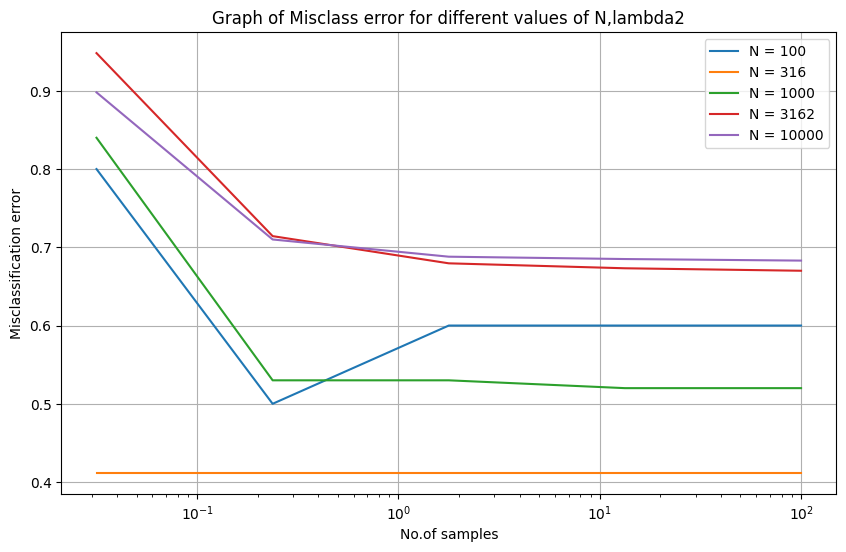

In [91]:
D = 10#No.of features
yeta =  0.01
lambda1 = 0
iter = 30000
tol = 1e-3
var = 4

wt= np.random.randn(D,1)
print(w.shape)
N = np.logspace(2,4, num = 5, dtype = int)
lambda2 = np.logspace(-2, 1.5, num = 5)
class_error_avg= np.zeros((5,5))#N value upto 5,lambda2 values also upto 5

for i,n in enumerate(N):
  G = np.identity(D)
  data_mat_X = gen_data_matrix(n,G)
  tar_vec_t = linear_bin_class(data_mat_X,wt,var)
  split = int(n*0.75)
  Train_data, valid_data = data_mat_X[:split], data_mat_X[split:]
  Train_t,valid_t = tar_vec_t[:split], tar_vec_t[split:]
  # z = np.dot(data_mat_X,wt)
  # sign_vec_z = tar_vec_t >0
  # z_vec_class = sign_vec_z.astype(int)


  for j,l2 in enumerate(lambda2):
    class_error_sum = 0
    for k in range(5):
      trained_w = grad_bin_class(Train_data,Train_t,wt,yeta,lambda1,l2,iter,tol)

      z = np.dot(valid_data,trained_w)
      sign_vec_z = z > 0
      z_vec_class  = sign_vec_z.astype(int)
      class_error = miss_class(valid_t,z_vec_class)
      class_error_sum = class_error_sum + class_error
    class_error_avg[i,j] = class_error_sum/(len(z_vec_class))
  #Plotting the graph of NRMSE for different values of N,lambda2
plt.figure(figsize = (10,6))
for i, n in enumerate(N):
  plt.xscale('log')
  plt.plot(np.reciprocal(lambda2), class_error_avg[i,:], label = f'N = {n}' )
plt.xlabel('No.of samples')
plt.ylabel('Misclassification error')
plt.title('Graph of Misclass error for different values of N,lambda2')
plt.grid()
plt.legend()

**In the binary classification, the miscalssification error is plotted against the (1/lambda2) for different values of N. It has high misclassification rate when lambda2 is high. If variance increases the values are oerlapped.**